In [1]:
from src.returns_analysis import analyse_returns_characteristics
from src.process_selection import process_selection, recommend_process
from src.processes import Processes
from src.get_data import HistoricalData
from src.util import parse_json
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

In [2]:
config = parse_json("config.json")

histdata = HistoricalData(config["binance"]["API_KEY"], config["binance"]["API_SECRET"])
df = histdata.getKline("SOLUSDC","1m").dropna()
# histdata.save_data("test_data.csv")

In [3]:
# df = pd.read_csv("test_data.csv").dropna()
# df.head()

BASIC STATS
mean : 3.4555189824873726e-05
std : 0.0005853125505405394
skewness : 0.4438584031441517
kurtosis : 2.9320290822333517
jb_pvalue : 1.4886066977469315e-85
min : -0.002797791571107262
max : 0.0027309363596667888


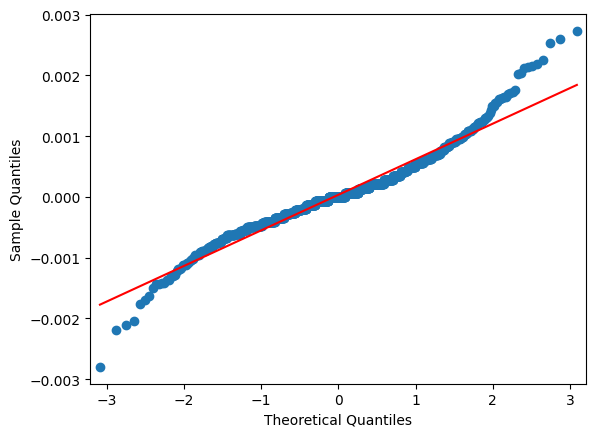

In [4]:
stats_summary = analyse_returns_characteristics(df,"results.html")

In [5]:
test_results = process_selection(df)

In [6]:
recommend_process(test_results,stats_summary)

[{'process': 'GARCH',
  'confidence': 'high',
  'reason': 'significant volatility clustering detected'},
 {'process': 'jump diffusion (merton)',
  'confidence': 'medium',
  'reason': 'significant jump frequency'},
 {'process': 'Ornstein-Uhlenbeck',
  'confidence': 'medium',
  'reason': 'evidence of mean reversion in returns'},
 {'process': 'heston stochastic volatility',
  'confidence': 'medium',
  'reason': 'non-normal distrib with fat tails and skewness'}]

In [7]:
processes = Processes(df)

GBM

In [12]:
log_returns = processes.gbm_log_returns(60,5)
fig = go.Figure()
for col in log_returns.columns:
    fig.add_trace(
        go.Scatter(
            x = log_returns.index,
            y = log_returns[col],
            name = col,
            mode = "lines"
        )
    )
fig.show()

In [13]:
price_path = processes.gbm_price_path(60,5)
fig = go.Figure()
for col in price_path.columns:
    fig.add_trace(
        go.Scatter(
            x = price_path.index,
            y = price_path[col],
            name = col,
            mode = "lines"
        )
    )
fig.show()